<a href="https://colab.research.google.com/github/ErikFantomex/TDA/blob/main/TDASeriesdetiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio de series de tiempo 
Datos : BTC/USD(2022/01/01-2022/10/19)

· python -m ipykernel install --user --name nombre --display-name nombre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funcion paralelizada

In [ ]:
import pandas as pd
import numpy as np
from gtda.time_series import TakensEmbedding, SlidingWindow
from gtda.homology import VietorisRipsPersistence
import matplotlib.pyplot as plt
 from gtda.diagrams import PersistenceEntropy,PersistenceLandscape,BettiCurve
from gudhi.wasserstein import wasserstein_distance
import gudhi
import ot
import multiprocessing
from functools import partial


In [ ]:
def encontrar_minimo_global(distancias):
    minimo = min(distancias)
    indice_minimo = distancias.index(minimo)
    return minimo, indice_minimo

# Ejemplo de uso
distancias = [5, 2, 8, 1, 10, 4]
minimo_global, indice_minimo = encontrar_minimo_global(distancias)
print("Valor mínimo:", minimo_global)
print("Índice del mínimo:", indice_minimo)


In [ ]:
def calcular_distancia_wasserstein(a, c, d, diagrams, i):
    return wasserstein_distance1(diagrams[a], diagrams[i])

def Guarda_distancias(a, c, d):
    """
    Guarda las distancias de wassertein en una lista 
    recibe a que es la coleccion 1 
    Parametros: (a,b) -> rango del conjunto [1] , (c,d)-> rango del conjunto [2] 
  
    Retorna:
    Una lista con las distancias de wassertein 
    """
    distancias = []
    # Crear un grupo de procesos
    pool = multiprocessing.Pool()
    # Crear una función parcial con los parámetros a, c y d fijados
    calcular_distancia_partial = partial(calcular_distancia_wasserstein, a, c, d, diagrams)
    # Calcular las distancias de forma paralela
    distancias = pool.map(calcular_distancia_partial, range(c, d))
    # Cerrar el grupo de procesos
    pool.close()
    # Esperar a que todos los procesos terminen
    pool.join()
    return distancias


In [ ]:
import multiprocessing
from functools import partial

def calcular_distancia_wasserstein(a, c, d, diagrams, i):
    return wasserstein_distance1(diagrams[a], diagrams[i])

def Guarda_distancias(a, c, d):
    """
    Guarda las distancias de wassertein en una lista 
    recibe a que es la coleccion 1 
    Parametros: (a,b) -> rango del conjunto [1] , (c,d)-> rango del conjunto [2] 
  
    Retorna:
    Una lista con las distancias de wassertein 
    """
    distancias = []
    # Crear un grupo de procesos
    pool = multiprocessing.Pool()
    # Crear una función parcial con los parámetros a, c y d fijados
    calcular_distancia_partial = partial(calcular_distancia_wasserstein, a, c, d, diagrams)
    # Calcular las distancias de forma paralela
    distancias = pool.map(calcular_distancia_partial, range(c, d))
    # Cerrar el grupo de procesos
    pool.close()
    # Esperar a que todos los procesos terminen
    pool.join()
    return distancias


In [ ]:
#Funcion para obtener distancias y guardarlas en una lista 
def Guarda_distancias(a,c,d):
  """
  Guarda las distancias de wassertein en una lista 
  recibe a que es la coleccion 1 
  Parametros: (a,b) -> rango del conjunto [1] , (c,d)-> rango del conjunto [2] 
  
  Retorna:
  Una lista con las distancias de wassertein 
  """
  #valor que puede cambiar
  a = 1
  distancias = []
  #for i in np.arange(a):
  for j in np.arange(c,d):
      distancias.append(wasserstein_distance1(diagrams[a],diagrams[j]))
  return distancias

In [ ]:
def Generador_de_graficas(lista_de_distancias):
  # Distancias 
  plt.plot(lista_de_distancias)
  plt.xlabel('Indidce de distancias')
  plt.ylabel('Distancias de wassertein')
  plt.title('Distancias')
  plt.savefig('grafica.png', dpi=600)
  return plt.show()

In [ ]:
def wasserstein_distance1(diag1, diag2):
    """
    Calcula la distancia de Wasserstein entre dos diagramas de persistencia.
    Parámetros:
    diag1, diag2: numpy arrays de dimension (n, 2) donde n es el número de puntos en los diagramas.
                  Cada fila representa un punto en el diagrama de persistencia con la primera columna
                  representando la coordenada de nacimiento y la segunda columna la coordenada de muerte.
    Retorna:
    La distancia de Wasserstein entre los dos diagramas de persistencia.
    """
    # Crear el objeto Gudhi para calcular la distancia de Wasserstein.
    # Calcular la distancia de Wasserstein.
    dist = gudhi.wasserstein.wasserstein_distance(diag1, diag2)
    return dist

In [ ]:
def Generador_de_graficas2(lista_de_distancias):
  # Distancias 
  #plt.plot()
  x = range(len(lista_de_distancias))
  plt.scatter(x,lista_de_distancias)
  plt.xlabel('Indidce de distancias')
  plt.ylabel('Distancias de wassertein')
  plt.title('Distancias')
  plt.savefig('grafica2.png', dpi=1000)
  return plt.show()

# Analisis topologico 

El análisis topológico se refiere al estudio de las propiedades geométricas y espaciales de los objetos y sus relaciones, sin tener en cuenta su tamaño, forma o posición exacta. En otras palabras, el análisis topológico se enfoca en la estructura de los datos más que en los valores de los datos.

En el análisis topológico, los datos se representan como conjuntos de puntos en el espacio, que se llaman nubes de puntos. La topología se utiliza para analizar y clasificar estas nubes de puntos en función de sus características y estructuras. Una técnica común utilizada en el análisis topológico es el complejo de Vietoris-Rips, que construye una estructura jerárquica de conjuntos de puntos a partir de las distancias entre ellos.

El análisis topológico se utiliza en diversas áreas, como la biología, la química, la física, la informática y la ingeniería. Por ejemplo, en la biología, el análisis topológico se utiliza para estudiar las relaciones entre las moléculas y las células, mientras que en la informática, se utiliza para la segmentación de imágenes y la clasificación de datos.


#Filtracion de Viertoris rips



El encaje de Takens y el complejo de Vietoris-Rips son dos técnicas comunes utilizadas en el análisis de datos y la geometría computacional. Ambos se relacionan con las nubes de puntos, que son conjuntos de puntos que se encuentran en un espacio n-dimensional.

El encaje de Takens es una técnica que permite representar un sistema dinámico complejo en un espacio de menor dimensión. Se utiliza para analizar datos que se derivan de un proceso dinámico y proporciona una forma de visualizar la estructura subyacente del proceso. El encaje de Takens se basa en la teoría del caos y utiliza la geometría de los datos para crear un espacio de menor dimensión.

El complejo de Vietoris-Rips es una técnica utilizada en la topología algebraica para analizar datos de nubes de puntos. El complejo de Vietoris-Rips se construye conectando puntos en la nube que se encuentran a una distancia menor o igual a un valor de umbral predefinido. El complejo resultante es una estructura algebraica que se puede analizar utilizando técnicas topológicas para extraer información sobre la forma y la estructura de la nube de puntos.

En conjunto, el encaje de Takens y el complejo de Vietoris-Rips pueden proporcionar información valiosa sobre la estructura y la topología de las nubes de puntos. Al representar los datos en un espacio de menor dimensión con el encaje de Takens, se puede simplificar la complejidad del conjunto de datos, lo que puede hacer más fácil su análisis. Luego, el complejo de Vietoris-Rips se utiliza para analizar la estructura de los datos y extraer información topológica que puede ser útil en la clasificación, el reconocimiento de patrones y otras tareas de análisis de datos.

In [ ]:
#Lectura de datos
df1 = pd.read_csv('/content/drive/MyDrive/datasets/BTCUSDT1m.csv')
df1.head()
df1['Close']
df1.describe
df1['Close timestamp']
close_ts = df1['Close'].to_numpy()
close_ts.shape
Time_ts = df1['Close time'].to_numpy()
df1.shape

(419041, 14)

In [ ]:
#Analisis topologico
#stride = 30 , ( d-c = 2500 , 10,000 ) window = 240 minutos , 
windows = SlidingWindow(size = 240,stride = 30)
sample = windows.fit_transform(close_ts)
sample.shape
#Encaje de takens
TE = TakensEmbedding(time_delay=1,dimension=2)
X_te = TE.fit_transform(sample)
X_te
#Procedimiento normal
VR = VietorisRipsPersistence(homology_dimensions=[0, 1],reduced_homology=False)  # Parameter explained in the text
diagrams = VR.fit_transform(X_te)
diagrams

array([[[0.        , 0.19312742, 0.        ],
        [0.        , 0.54083228, 0.        ],
        [0.        , 0.96166515, 0.        ],
        ...,
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ]],

       [[0.        , 0.4801034 , 0.        ],
        [0.        , 0.57723433, 0.        ],
        [0.        , 0.87475747, 0.        ],
        ...,
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ]],

       [[0.        , 0.30594316, 0.        ],
        [0.        , 0.51244509, 0.        ],
        [0.        , 0.5234521 , 0.        ],
        ...,
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ],
        [0.2220362 , 0.2220362 , 1.        ]],

       ...,

       [[0.        , 0.06324515, 0.        ],
        [0.        , 0.11180361, 0.        ],
        [0.        , 0

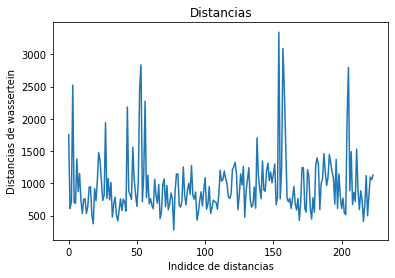

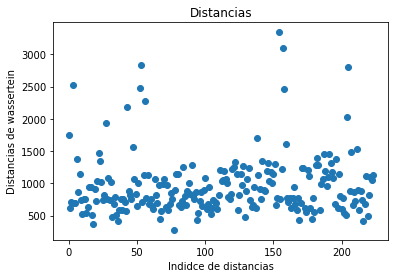

In [ ]:
lista_de_distancias = Guarda_distancias(4,30,254)
Generador_de_graficas(lista_de_distancias)
Generador_de_graficas2(lista_de_distancias)

# Siguientes pasos usar ocotillo y probar con los nuevos parametros 


* stride = 30 , ( d-c = 2500 , 10,000 )
window = 240 minutos , Teorema de estabilidad en el ocotillo, aunque seria bueno primero en mi maquina 

* 

# Haciendo la prediccion 